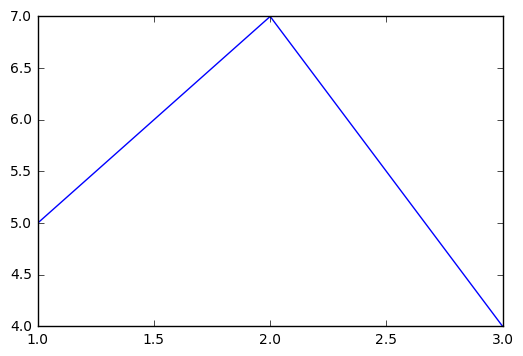

In [1]:
# intro
import matplotlib.pyplot as plt
plt.plot([1,2,3],[5,7,4])
plt.show()

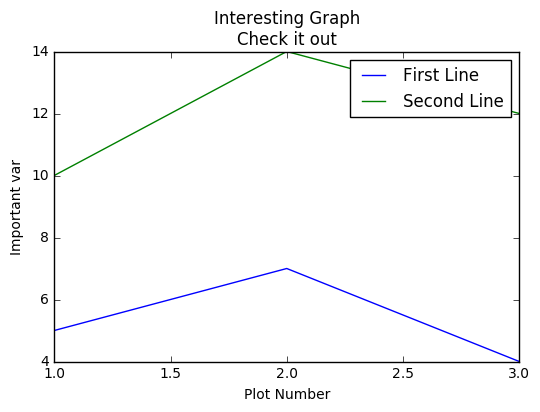

In [2]:
# legends, titles, and labels
import matplotlib.pyplot as plt
x = [1,2,3]
y = [5,7,4]
x2 = [1,2,3]
y2 = [10,14,12]
plt.plot(x, y, label='First Line')
plt.plot(x2, y2, label='Second Line')
plt.xlabel('Plot Number')
plt.ylabel('Important var')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

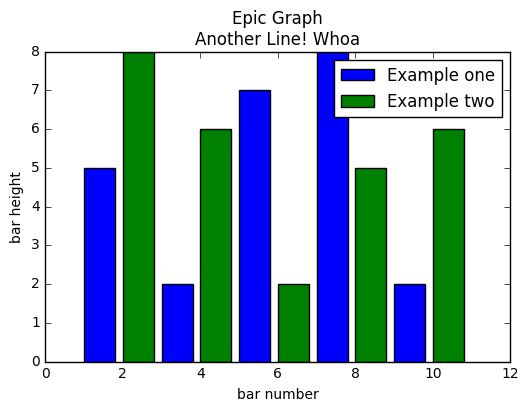

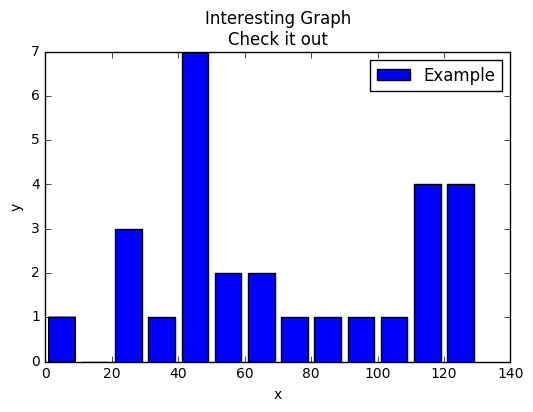

In [3]:
# Bar Charts and Histograms
import matplotlib.pyplot as plt
plt.bar([1,3,5,7,9],[5,2,7,8,2], label="Example one")
plt.bar([2,4,6,8,10],[8,6,2,5,6], label="Example two", color='g')
plt.legend()
plt.xlabel('bar number')
plt.ylabel('bar height')
plt.title('Epic Graph\nAnother Line! Whoa')
plt.show()

import matplotlib.pyplot as plt
population_ages = [22,55,62,45,21,22,34,42,42,4,99,102,110,120,121,122,130,111,115,112,80,75,65,54,44,43,42,48]
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]
plt.hist(population_ages, bins, histtype='bar', rwidth=0.8, label='Example')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.show()

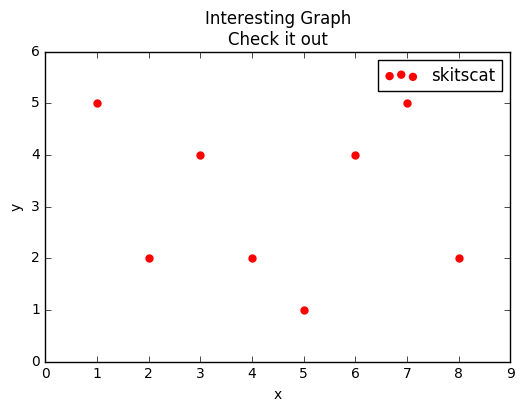

In [4]:
# Scatter Plots
import matplotlib.pyplot as plt
x = [1,2,3,4,5,6,7,8]
y = [5,2,4,2,1,4,5,2]
plt.scatter(x,y, label='skitscat', color='r', s=25, marker="o")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

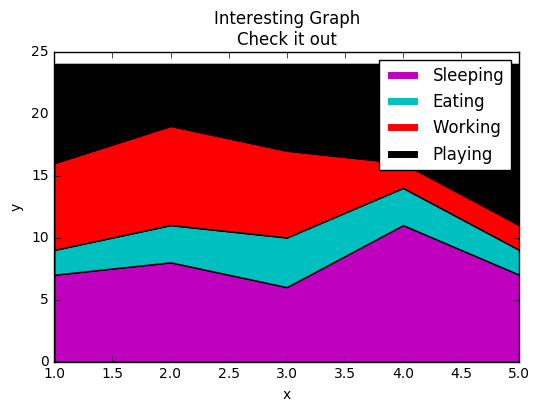

In [5]:
# Stack Plots
import matplotlib.pyplot as plt
days = [1,2,3,4,5]
sleeping = [7,8,6,11,7]
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing = [8,5,7,8,13]
# hack to create legend
plt.plot([],[],color='m', label='Sleeping', linewidth=5)
plt.plot([],[],color='c', label='Eating', linewidth=5)
plt.plot([],[],color='r', label='Working', linewidth=5)
plt.plot([],[],color='k', label='Playing', linewidth=5)
plt.stackplot(days, sleeping,eating,working,playing, colors=['m','c','r','k'])
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.show()

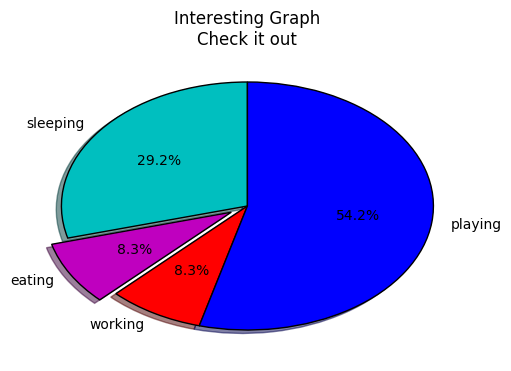

In [6]:
# Pie Charts
import matplotlib.pyplot as plt
slices = [7,2,2,13]
activities = ['sleeping','eating','working','playing']
cols = ['c','m','r','b']
plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0.1,0,0),
        autopct='%1.1f%%')
plt.title('Interesting Graph\nCheck it out')
plt.show()

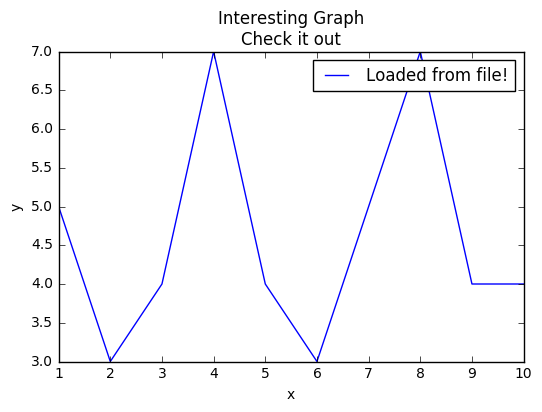

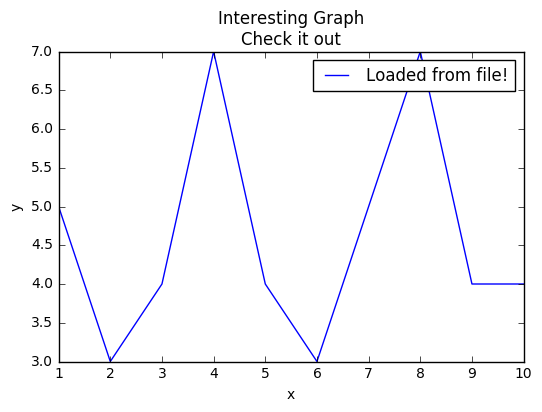

In [7]:
# Loading Data from Files
import matplotlib.pyplot as plt
import csv
x = []
y = []
with open('../../../../data/matplotlib_example.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.plot(x,y, label='Loaded from file!')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
import numpy as np
x, y = np.loadtxt('../../../../data/matplotlib_example.csv', delimiter=',', unpack=True)
plt.plot(x,y, label='Loaded from file!')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

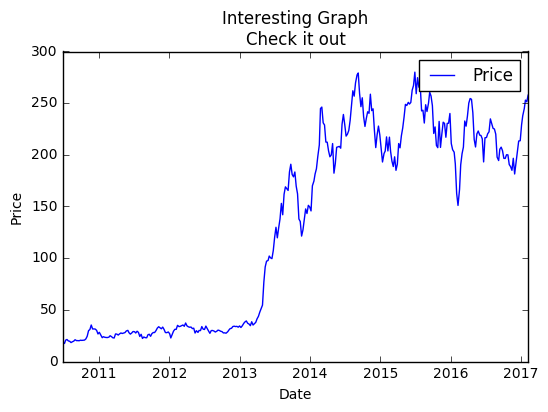

In [9]:
# Data from the Internet
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates
from matplotlib.dates import bytespdate2num

def graph_data(stock):
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line:
                stock_data.append(line)
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y%m%d')})
    plt.plot_date(date, closep,'-', label='Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.show()
graph_data('TSLA')

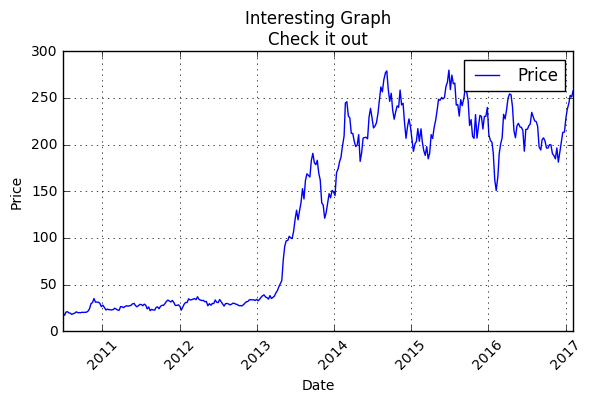

In [11]:
# Basic customization
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates
from matplotlib.dates import bytespdate2num

def graph_data(stock):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))   
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})
    ax1.plot_date(date, closep,'-', label='Price')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()
graph_data('TSLA')

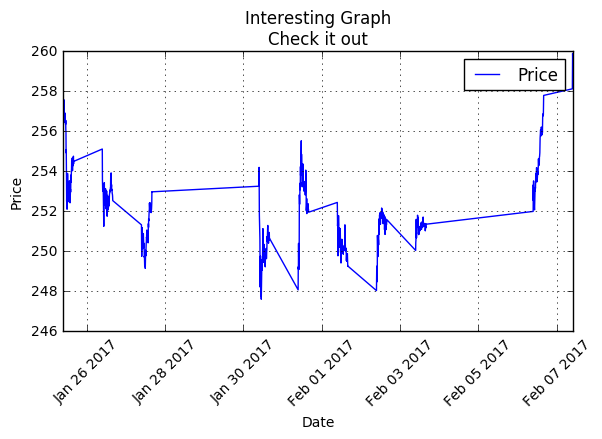

In [12]:
# Unix Time
# With the Yahoo Finance API, you will notice that if you use large time frames, like 1y for one year, 
# you will get those date stamps we've been working with, but, if you use something like 10d for 10 days, 
# you will instead get timestamps that are unix time.
# Unix time is the number of seconds after Jan 1st 1970, and it represents a normalized method for time 
# across programs.
import matplotlib.pyplot as plt
import numpy as np
import urllib
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.dates import bytespdate2num

def graph_data(stock):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))   
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10d/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True)
    dateconv = np.vectorize(dt.datetime.fromtimestamp)
    date = dateconv(date)
    ax1.plot_date(date, closep,'-', label='Price')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()
graph_data('TSLA')

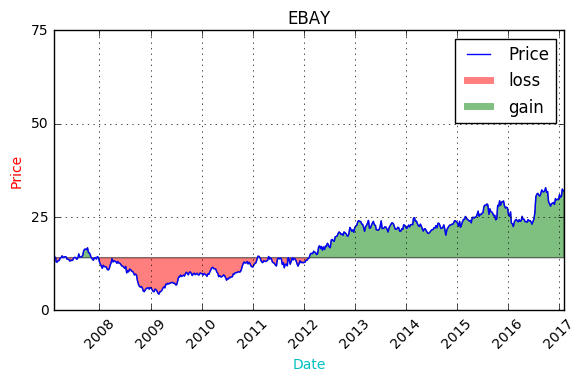

In [13]:
# Colors and Fills
import matplotlib.pyplot as plt
import numpy as np
import urllib
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.dates import bytespdate2num

def graph_data(stock):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))  
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})
    ax1.plot_date(date, closep,'-', label='Price')
    ax1.plot([],[],linewidth=5, label='loss', color='r',alpha=0.5)
    ax1.plot([],[],linewidth=5, label='gain', color='g',alpha=0.5)
    ax1.fill_between(date, closep, closep[0],where=(closep > closep[0]), facecolor='g', alpha=0.5)
    ax1.fill_between(date, closep, closep[0],where=(closep < closep[0]), facecolor='r', alpha=0.5)  
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
    ax1.xaxis.label.set_color('c')
    ax1.yaxis.label.set_color('r')
    ax1.set_yticks([0,25,50,75])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()
graph_data('EBAY')

In [ ]:
# Spines and Horizontal Lines
